# Camera calibration

In [1]:
#import all dependencies

import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

%matplotlib inline
%load_ext autoreload


In [2]:
%autoreload 2
import camera as cam

#find chessboard corners for all calibration images
obj_points = []
img_points = []

camera_cal_imgs = [f for f in glob.glob("camera_cal/*.jpg")]
for img_path in camera_cal_imgs:
    pattern_found, objp, corners = cam.extract_obj_points(img_path, 9, 6)
    if pattern_found:
        obj_points.append(objp)
        img_points.append(corners)


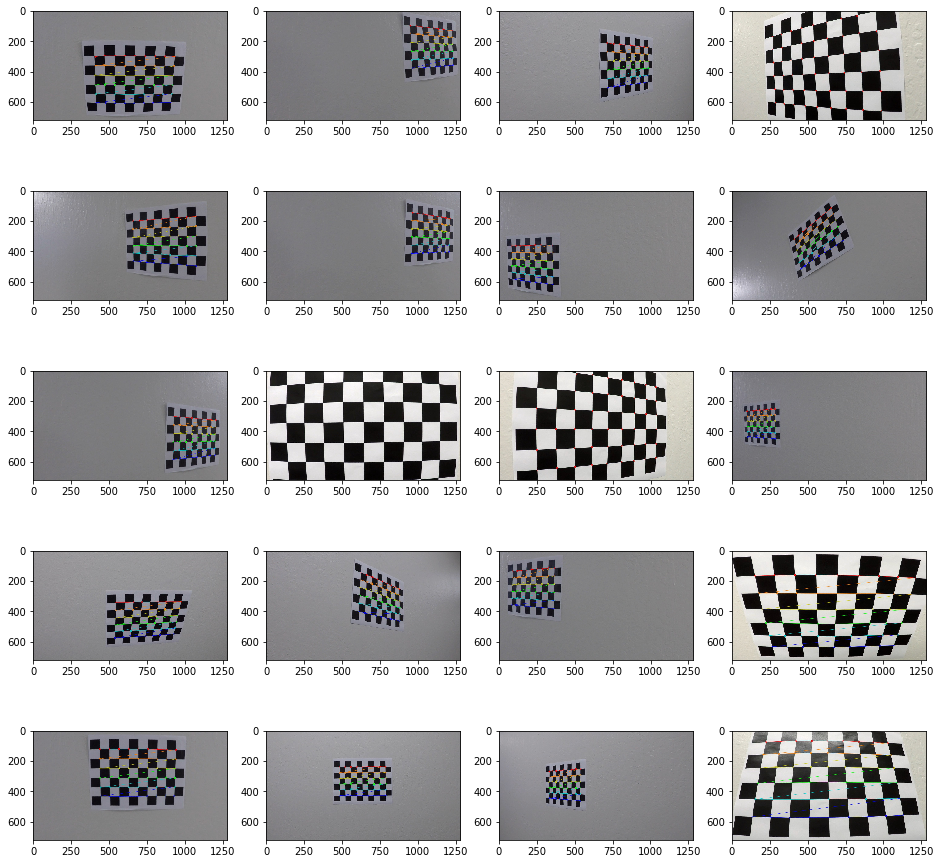

In [13]:
import visualization as vs

#display chessboard photos with found corners
vs.show_img_grid("cb_corners", 4, (16, 16))

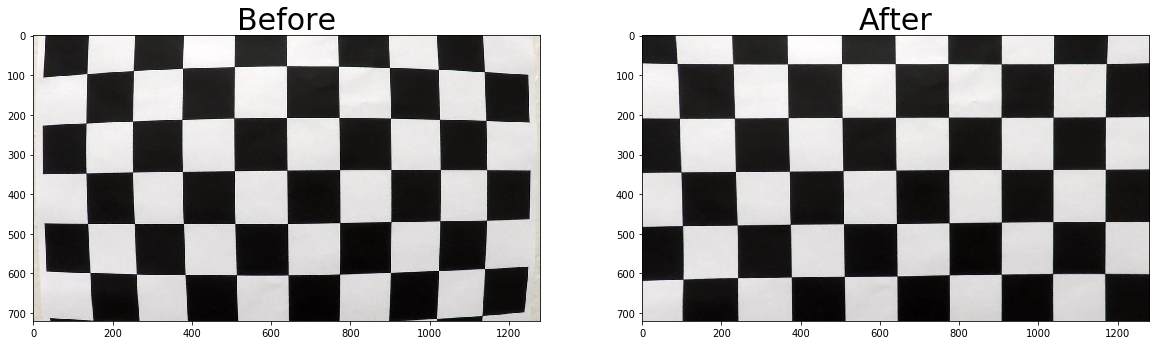

In [25]:
#perform camera calibration 

#for chessboard images
cb_img_test = mpimg.imread('camera_cal/calibration1.jpg')
cb_img_size = (cb_img_test.shape[1], cb_img_test.shape[0])

ret, mtx, dist, rvecs, tvecs = cam.calibrate_camera(obj_points, img_points, cb_img_size)

#undistort chessboard image 
undist_cb = cam.undistort(cb_img_test, mtx, dist)

#display results
vs.compare_two_img(cb_img_test, undist_cb)

In [105]:
#now let's do the same with the road image
#calibrate and save results
img_test = mpimg.imread('test_images/test3.jpg')
img_size = (img_test.shape[1], img_test.shape[0])

ret, mtx, dist, rvecs, tvecs = cam.calibrate_camera(obj_points, img_points, img_size)

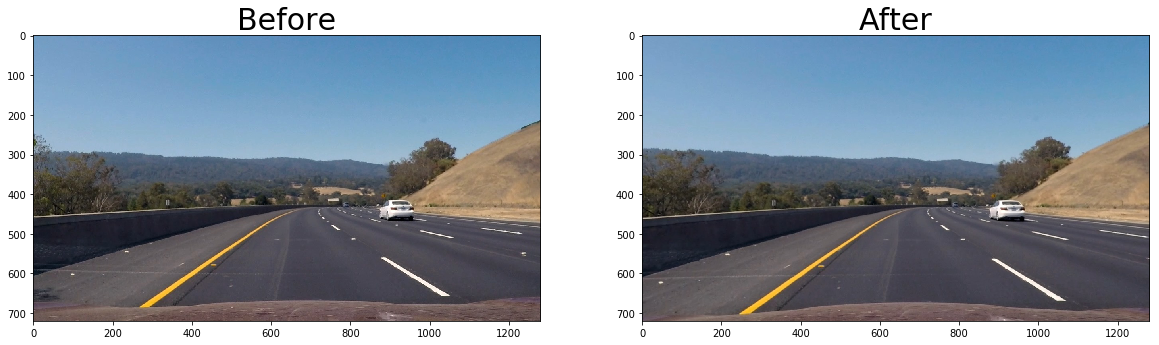

In [106]:
#load results and undistort a test image
mtx, dist = cam.load_calibration_results()
img_test_undist = cam.undistort(img_test, mtx, dist)

#display results
vs.compare_two_img(img_test, img_test_undist)

# Color and gradient thresholding

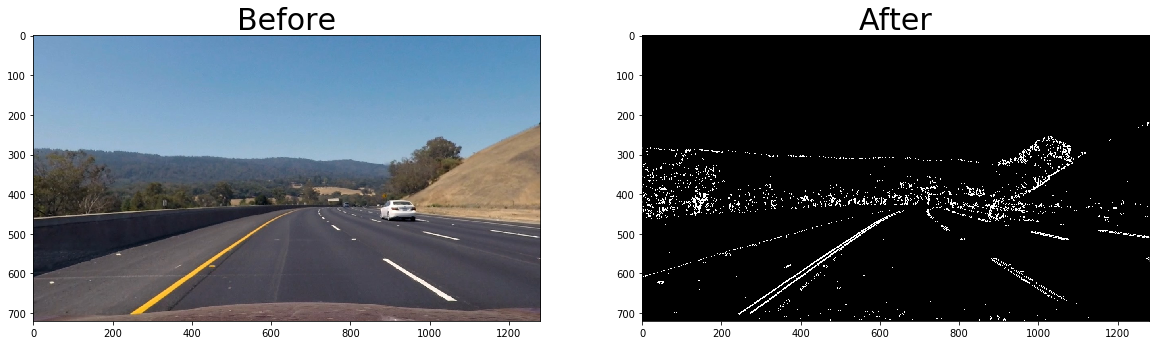

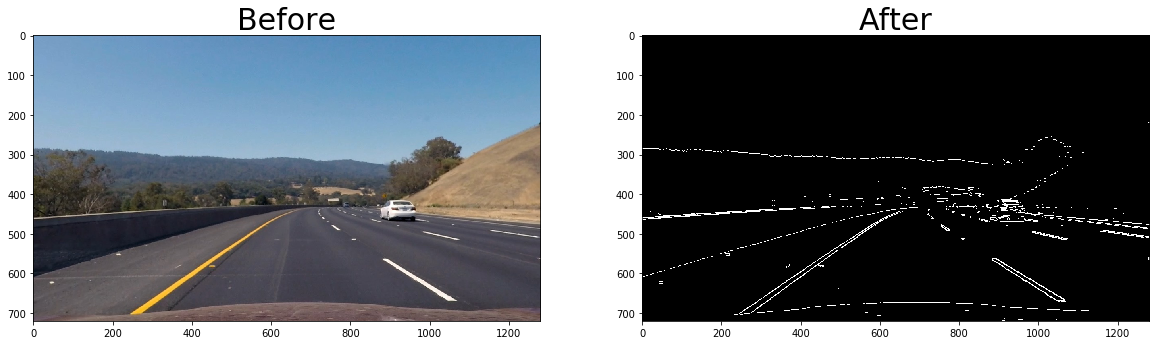

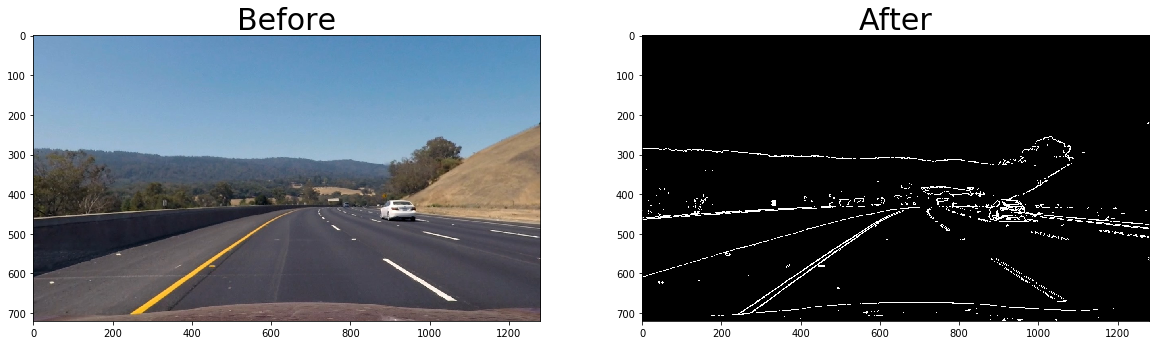

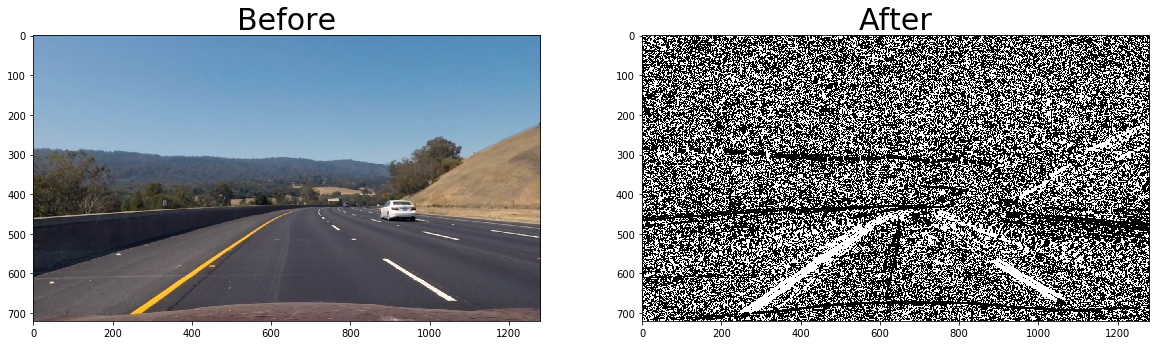

In [110]:
import processing as pr

# Apply each of the thresholding functions and show results
gradx = pr.abs_sobel_thresh(img_test_undist, orient='x', sobel_kernel=3, thresh=(20, 110))
grady = pr.abs_sobel_thresh(img_test_undist, orient='y', sobel_kernel=3, thresh=(50, 200))
mag_binary = pr.mag_thresh(img_test_undist, sobel_kernel=3, thresh=(40, 150))
dir_binary = pr.dir_threshold(img_test_undist, sobel_kernel=15, thresh=(0.7, 1.3))

vs.compare_with_binary(img_test_undist, gradx)
vs.compare_with_binary(img_test_undist, grady)
vs.compare_with_binary(img_test_undist, mag_binary)
vs.compare_with_binary(img_test_undist, dir_binary)


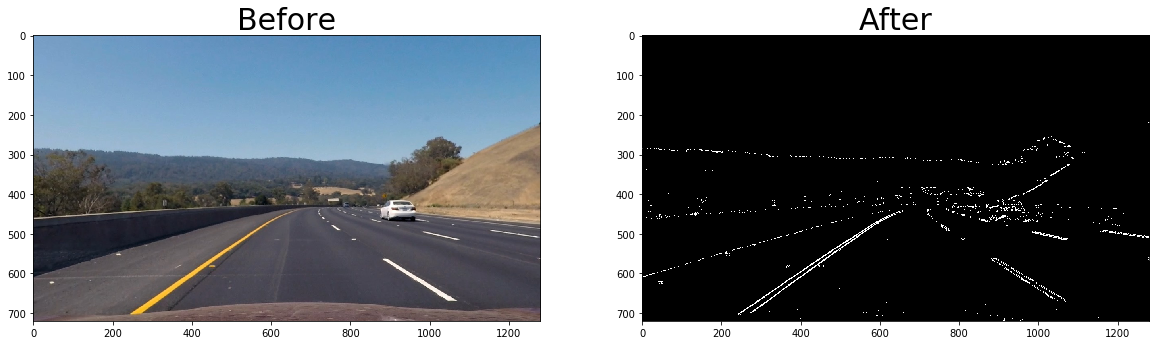

In [111]:
# Combine all transformations together, encapsulate them is a function and display a result 
combined = pr.gradient_threshold(img_test_undist)
vs.compare_with_binary(img_test_undist, combined)